In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl
import numpy as np
from scipy.stats import linregress
import statsmodels.api as sm

dataframe = pd.read_stata('dataset.dta')
dataframe.to_csv('dta_to_csv_file.csv')
pd.io.stata.StataReader('dataset.dta').variable_labels()

{'id': 'identification number',
 'ost': 'east/west at draw',
 'branche': 'share in 22 ecnomic sectors',
 'filter': 'innovator filter',
 'gruend': 'Start-ups',
 'zusamm': 'merger',
 'zusamm10': 'increase in sales because of merger',
 'geschl': 'parts of the company closed',
 'geschl10': 'decrease in sales because of closing',
 'absatz': 'Core market of business',
 'um': 'Revenue 2000',
 'ex': 'exports 2000',
 'exno': 'no exports',
 'bges': 'employed',
 'pd': 'Product innovations y/n',
 'pz': 'Process innovation',
 'pa': 'project cancelation',
 'pn': 'Not yet finished projects',
 'pdentw': 'Innovation developer',
 'umneu': 'Revenue share of new/improved products/services',
 'umunw': 'Revenue unchanged products',
 'mneu': 'New products (Y/N)',
 'mneup': 'Revenue share of new products',
 'pzentw': 'Developmer of process innovation',
 'rek': 'cost reduction',
 'rekp': 'cost reduction in percent',
 'iafetz': 'Internal R&D (Y/N)',
 'iafue': 'Expenditure on internal R&D',
 'iavfetz': 'External

In [3]:
#Lees de data in en vorm een dataframe waarop we verder werken
dataSet = pd.read_csv('dta_to_csv_file.csv')



In [25]:
dataSet['fuebab'].describe()


count    1380.000000
mean       26.706067
std       267.487723
min         0.000000
25%         0.000000
50%         0.000000
75%         2.573060
max      6141.282000
Name: fuebab, dtype: float64

            um  umneu       branche schutz1 schutz2 schutz3 schutz4 schutz5  \
2     1.829996      0    HolzPapier    nein    nein    nein    nein    nein   
3     3.071281      8        Metall    nein    nein    nein    nein    nein   
4     1.901261      8     EDV/Telek    nein    nein    nein      ja      ja   
5     4.129015      0   Fahrzeugbau    nein    nein    nein    nein    nein   
6     2.382081      0        Metall    nein    nein    nein    nein    nein   
...        ...    ...           ...     ...     ...     ...     ...     ...   
1992  4.252620      5      ETechnik      ja    nein      ja      ja      ja   
1993  0.727494      7   GlasKeramik    nein    nein    nein    nein    nein   
1994  1.034749      0  Maschinenbau    nein    nein    nein    nein    nein   
1997  2.526801      0       GHandel    nein    nein    nein    nein    nein   
1999  4.051942      0        Textil    nein    nein    nein    nein    nein   

     schutz6 schutz7     fuebab  counter  
2       

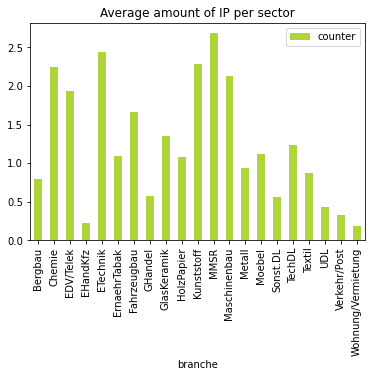

In [34]:
#Start van data manipulatie om linregres uit te voeren
linregresdata = dataSet.filter(items=['um', 'umneu','branche', 'schutz1', 'schutz2', 'schutz3', 'schutz4'
                                      , 'schutz5', 'schutz6', 'schutz7', 'fuebab'])
#verwijder alle NAN
linregresdata = linregresdata.dropna()

#Creëer een extra kolom met de aantallen IP per bedrijf
listToAdd = []
for index, row in linregresdata.iterrows():
    counter = 0
    if row['schutz1']=='ja':
        counter+=1
    if row['schutz2']=='ja':
        counter+=1
    if row['schutz3']=='ja':
        counter+=1
    if row['schutz4']=='ja':
        counter+=1
    if row['schutz5']=='ja':
        counter+=1
    if row['schutz6']=='ja':
        counter+=1
    if row['schutz7']=='ja':
            counter+=1
    listToAdd.append(counter)

linregresdata['counter']=listToAdd
linregresdata= linregresdata.replace(['x=0','0<x<5','5<=x<10','10<=x<15','15<=x<20',
                                           '20<=x<30','30<=x<50', '50<=x<75', '75<=x<=100'], 
                                          [0,1,2,3,4,5,6,7,8])

#gemiddelde aantal ip per branche 
linanalysis = linregresdata.groupby('branche', as_index=False)['counter'].mean()
linanalysis.plot(kind='bar', x='branche', y= 'counter', color='#b0d43b')
plt.title("Average amount of IP per sector")
print(linanalysis)
plt.show()


76        25.683992
198        0.000000
232       11.234939
247      989.046750
328        2.434370
352        0.000000
386        0.777648
444        0.000000
481        0.000000
575        4.719000
610        6.090768
630        0.000000
640        0.732123
648        2.608376
655        0.000000
707       24.447336
721      200.325450
798      149.996480
1080       0.000000
1095      11.274000
1159       4.712484
1182       0.000000
1242       5.157185
1249       1.096232
1259       9.266180
1358      14.621337
1371      49.799076
1441      25.484837
1479      35.342670
1526       0.000000
1662      11.450611
1682       3.786260
1881       4.802971
1913    3040.410200
1915       7.406408
1992       9.484732
Name: fuebab, dtype: float64
Lin regress of Technical sector: 


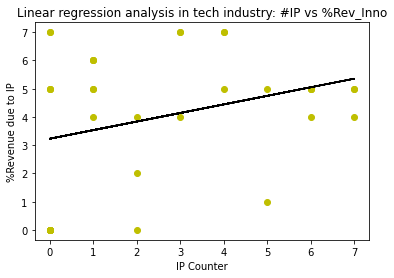

LinregressResult(slope=0.30355329949238585, intercept=3.230203045685279, rvalue=0.3034955329976209, pvalue=0.07195254833352753, stderr=0.16344059048610476)

In [38]:
#is er een verband tss aantal IP en percentueel revenue door innovatie in de technische sector?
# branches: ETechnik & TechDL
techData = linregresdata.loc[linregresdata['branche']=='ETechnik']
techData.append(linregresdata.loc[linregresdata['branche']=='TechDL'])

#lin regression check
x = techData['counter'].reset_index()
x = x.drop(columns='index')
x = np.array(x).squeeze()

y = techData['umneu'].reset_index()
y = y.drop(columns='index')
y = np.array(y).squeeze()

coef = np.polyfit(x, y, 1)
polynomialFn_Tech = np.poly1d(coef)

plt.title('Linear regression analysis in tech industry: #IP vs %Rev_Inno')
pl.plot(x, y, 'yo', x, polynomialFn_Tech(x), '--k')
plt.xlabel('IP Counter')
plt.ylabel('%Revenue due to IP')
pl.show()
print('Lin regress of Technical sector: ')
#P > 0.05, niet goed dus voor technische sector ookal toont de graf een stijgende lijn
linregress(x, y)


In [42]:
#voor de mooie tabel als beschrijving van de lineaire regress hierboven

#Zet in de call hieronder jouw main variabele alsook de controle vars. door dit te doen indien 'um' als controle
# X = techData['counter', 'um']. De rest is gelijk, alsook het aanpassen van de Y waarde of dergelijke. Weet dat
# ik nu wel enkel heb verwezen naar de techData dataframe. Als je andere datasets hebt, die wat aangepast zijn zoals reeds 
# gedaan is in de code hieronder alsook hierboven, verwijs dan naar die dataframe ipv techData
X = techData[['counter', 'fuebab']] #fuebab is een controle var nu.
X = sm.add_constant(X)
Y = techData['umneu']
model = sm.OLS(Y, X).fit()
pred = model.predict(X)
print_model = model.summary()
print(print_model)



               um  umneu   branche schutz1 schutz2 schutz3 schutz4 schutz5  \
76      90.934500      1  ETechnik      ja      ja      ja    nein      ja   
198     15.889210      0  ETechnik    nein    nein    nein    nein    nein   
232      6.230399      7  ETechnik      ja      ja    nein    nein    nein   
247   7266.830000      5  ETechnik      ja    nein    nein    nein      ja   
328      1.262663      6  ETechnik    nein    nein      ja    nein    nein   
352      1.543683      0  ETechnik    nein    nein    nein    nein    nein   
386      0.158610      5  ETechnik    nein    nein    nein    nein    nein   
444      2.751943      0  ETechnik    nein    nein    nein    nein    nein   
481      4.266384      0  ETechnik    nein    nein    nein    nein    nein   
575     13.492969      4  ETechnik    nein    nein    nein    nein      ja   
610     13.850167      5  ETechnik      ja      ja      ja    nein      ja   
630      3.759566      0  ETechnik    nein    nein    nein    ne

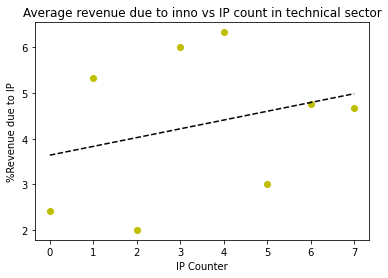

LinregressResult(slope=0.19246031746031753, intercept=3.6388888888888884, rvalue=0.286487409053814, pvalue=0.4915042377199206, stderr=0.26276264420394396)

In [43]:
#Check the averages of revenue due to innovation given the amount of IP
techData = techData.groupby('counter', as_index=False)['umneu'].mean()
techData.plot(kind='scatter', x='counter', y='umneu', color='blue')
x = techData['counter']
y = techData['umneu']
coef = np.polyfit(x, y, 1)
polynomialFn_Tech_Grouped = np.poly1d(coef)
plt.title('Average revenue due to inno vs IP count in technical sector')
plt.xlabel('IP Counter')
plt.ylabel('%Revenue due to IP')
pl.plot(x, y, 'yo', x, polynomialFn_Tech_Grouped(x), '--k')

#Merk op dat als we de gemiddelden nemen van percentage revenue door innovatie van alle bedrijven op bepaalde counter,
# dat we nog steeds niet succesvol zijn
plt.show()
#P > 0,05
linregress(x, y)


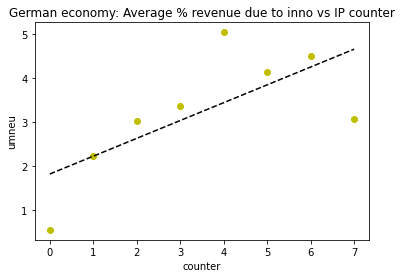

Lin regression summary: 


LinregressResult(slope=0.40550379937646075, intercept=1.8147183841427608, rvalue=0.7016098811749971, pvalue=0.05244209827605474, stderr=0.16813023647097797)

In [46]:
generalData = linregresdata.groupby('counter', as_index=False)['umneu'].mean()
generalData.plot(kind= 'scatter', x='counter', y='umneu', color='#b0d43b')

x=generalData['counter']
y=generalData['umneu']

coef = np.polyfit(x, y, 1)
polynomialFn = np.poly1d(coef)
plt.title('German economy: Average % revenue due to inno vs IP counter')
pl.plot(x, y, 'yo', x, polynomialFn(x), '--k')
pl.show()
print("Lin regression summary: ")
linregress(x, y)

In [47]:
#0 to 1 forms of IP
linregresdata2 = linregresdata
entries = []
new = pd.DataFrame()
print(len(linregresdata2['branche']))
for i in range(0, len(linregresdata2['counter'])):
    #print(linregresdata2['counter'].iloc[i] == 0)
    if linregresdata2['counter'].iloc[i] == 0 or linregresdata2['counter'].iloc[i]== 1:
        #print('this' + str(linregresdata2.iloc[i]))
        entries.append(linregresdata2.iloc[i])

zero_one_ip = pd.DataFrame(entries)
#result = pd.concat([linregresdata2, zero_one_ip]).reset_index()
print(zero_one_ip)
verylowipstats = zero_one_ip.groupby('branche', as_index=False)['umneu'].mean()
print(verylowipstats)

1005
            um  umneu       branche schutz1 schutz2 schutz3 schutz4 schutz5  \
2     1.829996      0    HolzPapier    nein    nein    nein    nein    nein   
5     4.129015      0   Fahrzeugbau    nein    nein    nein    nein    nein   
6     2.382081      0        Metall    nein    nein    nein    nein    nein   
7     1.852963      0      EHandKfz    nein    nein    nein    nein    nein   
8     0.637759      0           UDL    nein    nein    nein    nein    nein   
...        ...    ...           ...     ...     ...     ...     ...     ...   
1990  0.237513      0        TechDL    nein    nein    nein    nein    nein   
1993  0.727494      7   GlasKeramik    nein    nein    nein    nein    nein   
1994  1.034749      0  Maschinenbau    nein    nein    nein    nein    nein   
1997  2.526801      0       GHandel    nein    nein    nein    nein    nein   
1999  4.051942      0        Textil    nein    nein    nein    nein    nein   

     schutz6 schutz7    fuebab  counter  
2   

In [51]:
print(dataSet['branche'].value_counts())
df = dataSet.filter(items=['um', 'umneu', 'schutz1', 'fuebab'])



TechDL                190
Verkehr/Post          176
GHandel               156
Sonst.DL              152
Maschinenbau          138
Metall                131
Bank/Vers             118
EHandKfz              101
UDL                    86
HolzPapier             85
Wohnung/Vermietung     83
ETechnik               78
EDV/Telek              69
Kunststoff             69
ErnaehrTabak           63
Chemie                 61
Textil                 57
MMSR                   57
GlasKeramik            41
Fahrzeugbau            35
Bergbau                31
Moebel                 23
Name: branche, dtype: int64


              um  umneu schutz1       fuebab
1409      0.0000    7.0      ja     0.000000
276       0.0000    8.0      ja     1.634671
1757      0.0000    8.0      ja     0.958456
826       0.0000    7.0      ja     0.000000
897       0.0000    8.0      ja     3.612716
...          ...    ...     ...          ...
371    5608.2803    0.0      ja    75.724266
724    5620.2954    0.0      ja    75.519930
247    7266.8300    5.0      ja   989.046750
1731  12204.1730    3.0      ja  6141.282000
1063  12907.8730    6.0      ja  3997.493200

[316 rows x 4 columns]
                            OLS Regression Results                            
Dep. Variable:                  umneu   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     2.406
Date:                Tue, 12 May 2020   Prob (F-statistic):             0.0919
Time:                        19:50:42   L

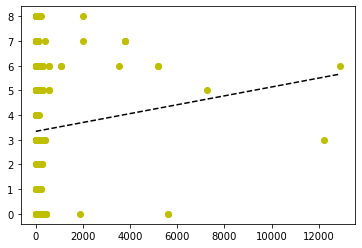

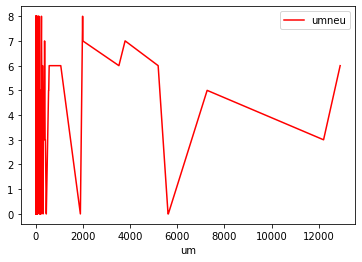

In [68]:
#Check eens Rev/RevDoorInno bij bedrijven met patenten

schutz1 = df['schutz1'].dropna()

dfSchutz1IPTrue = df.loc[df['schutz1']=='ja']

dfSchutz1IPTrue = dfSchutz1IPTrue.replace(['x=0','0<x<5','5<=x<10','10<=x<15','15<=x<20',
                                           '20<=x<30','30<=x<50', '50<=x<75', '75<=x<=100'], 
                                          [0,1,2,3,4,5,6,7,8])

dfSchutz1IPTrue['umneu'].fillna(0, inplace=True)
dfSchutz1IPTrue['um'].fillna(0, inplace=True)
dfSchutz1IPTrue['fuebab'].fillna(0, inplace=True)
dfSchutz1IPTrue = dfSchutz1IPTrue.sort_values(by=['um'], ascending=True)
print(dfSchutz1IPTrue)


x = dfSchutz1IPTrue['um']
y = dfSchutz1IPTrue['umneu']
coef = np.polyfit(x, y, 1)
polynomialFn = np.poly1d(coef)
pl.plot(x, y, 'yo', x, polynomialFn(x), '--k')
dfSchutz1IPTrue.plot(kind='line', x='um', y= 'umneu', color='red')
#Je ziet duidelijk nog niet echt een verband tss revenue en percentueel rev 
#door innovatie. We zullen dus per branche moeten zien hoeveel percentueel innovatie
#bijdraagt per branche.
plt.show()

#P-waarde is ook te hoog : 0.15 > 0.05 om signifivant te zijn
X = dfSchutz1IPTrue[['um', 'fuebab']] #fuebab is een controle var nu.
X = sm.add_constant(X)
Y = dfSchutz1IPTrue['umneu']
model = sm.OLS(Y, X).fit()
pred = model.predict(X)
print_model = model.summary()
print(print_model)



                            OLS Regression Results                            
Dep. Variable:                  umneu   R-squared:                       0.120
Model:                            OLS   Adj. R-squared:                  0.113
Method:                 Least Squares   F-statistic:                     17.24
Date:                Tue, 12 May 2020   Prob (F-statistic):           9.55e-08
Time:                        19:55:28   Log-Likelihood:                -624.21
No. Observations:                 257   AIC:                             1254.
Df Residuals:                     254   BIC:                             1265.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4503      0.224     10.945      0.0

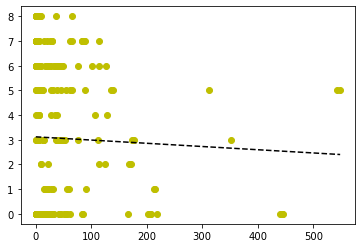

In [70]:
#Wat nu in kleine bedrijven?
smallBusinesses = dfSchutz1IPTrue.loc[dfSchutz1IPTrue['fuebab']<30]
smallBusinesses = smallBusinesses.loc[smallBusinesses['um']<3000]#de uitschieter verwijderen.
X = smallBusinesses[['um', 'fuebab']] #fuebab is een controle var nu.
X = sm.add_constant(X)
Y = smallBusinesses['umneu']
model = sm.OLS(Y, X).fit()
predSmallBus = model.predict(X)
print_model = model.summary()
print(print_model)

#Er is dus geen lin verband tussen de revenue van een bedrijf en zijn revenue door innovatie.

#create plot of the small businesses
x = smallBusinesses['um']
y = smallBusinesses['umneu']
coef = np.polyfit(x, y, 1)
polynomialFn = np.poly1d(coef)
pl.plot(x, y, 'yo', x, polynomialFn(x), '--k')
plt.show()

               branche     umneu
0            Bank/Vers  7.000000
1              Bergbau  0.666667
2               Chemie  4.058824
3            EDV/Telek  4.000000
4             EHandKfz  4.000000
5             ETechnik  4.923077
6         ErnaehrTabak  3.000000
7          Fahrzeugbau  5.071429
8              GHandel  2.733333
9          GlasKeramik  3.600000
10          HolzPapier  3.750000
11          Kunststoff  3.526316
12                MMSR  4.833333
13        Maschinenbau  4.500000
14              Metall  4.300000
15              Moebel  3.000000
16            Sonst.DL  0.000000
17              TechDL  5.093750
18              Textil  1.500000
19                 UDL  6.000000
20        Verkehr/Post       NaN
21  Wohnung/Vermietung  0.000000
           branche       umneu schutz1     fuebab
0       Kunststoff         NaN    nein        NaN
1         Sonst.DL         NaN     NaN        NaN
2       HolzPapier         x=0    nein   0.000000
3           Metall  75<=x<=100    nein   

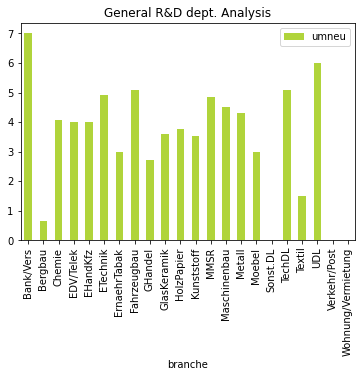

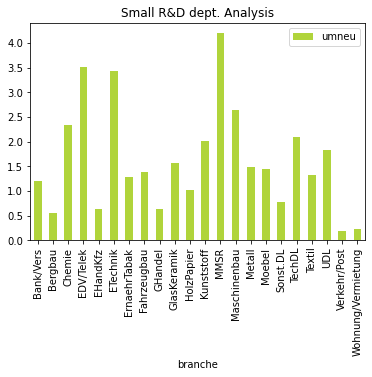

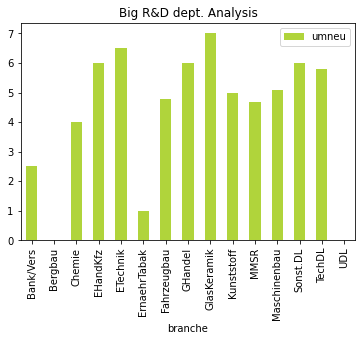

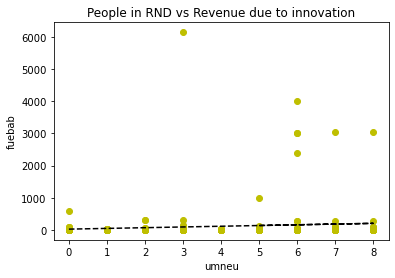

In [101]:
'''Stappenplan percentueel te werk gaan: 
    1. Filter op basis van ip
    2. Maak van de percentages rev door inno een numerieke voorstelling zoals 
    eerder al gedaan
    3. Per branche het gemiddelde tonen aan percentages
    
'''
#Patent

#filter op alle bedrijven met een patent en check hun % aan revenue door innovatieve prodcuten
dfCommon = dataSet.filter(items=['branche', 'umneu', 'schutz1', 'fuebab'])
dfCommon = dfCommon.replace(['x=0','0<x<5','5<=x<10','10<=x<15','15<=x<20',
                                           '20<=x<30','30<=x<50', '50<=x<75', '75<=x<=100'], 
                                          [0,1,2,3,4,5,6,7,8])
dfCommon = dfCommon.loc[dfCommon['schutz1']=='ja']
dfCommon['branche'].unique()
patentAnalysis = dfCommon.groupby('branche', as_index=False)['umneu'].mean()
print(patentAnalysis)
patentAnalysis.plot(kind='bar', x='branche', y= 'umneu', color='#b0d43b')
plt.title("General R&D dept. Analysis")
plt.show()

#Now take the people working in RND into consideration
dfCommonPat = dataSet.filter(items=['branche', 'umneu', 'schutz1', 'fuebab'])
#dfCommonPat = dfCommonPat['fuebab'].fillna(0, inplace=True)
print(dfCommonPat)
dfCommonPat = dfCommonPat.replace(['x=0','0<x<5','5<=x<10','10<=x<15','15<=x<20',
                                           '20<=x<30','30<=x<50', '50<=x<75', '75<=x<=100'], 
                                          [0,1,2,3,4,5,6,7,8])

dfCommonPatBig = dfCommonPat.loc[dfCommonPat['fuebab']>30]
dfCommonPat = dfCommonPat.loc[dfCommonPat['fuebab']<30]

#small RND dept
patentAnalysisSmallBus = dfCommonPat.groupby('branche', as_index=False)['umneu'].mean()
patentAnalysisSmallBus.plot(kind='bar', x='branche', y= 'umneu', color='#b0d43b')
plt.title("Small R&D dept. Analysis")
plt.show()

#30 employees or more in RND
patentAnalysisBigBus = dfCommonPatBig.groupby('branche', as_index=False)['umneu'].mean()
patentAnalysisBigBus.plot(kind='bar', x='branche', y= 'umneu', color='#b0d43b')
plt.title("Big R&D dept. Analysis")
plt.show()

#Check for lin relation between revenue due to inno witrh RND personel
dfCommon['fuebab'].fillna(0, inplace=True)
dfCommon['umneu'].fillna(0, inplace=True)
X = dfCommon[['fuebab']] #fuebab is een controle var nu.
X = sm.add_constant(X)
Y = dfCommon['umneu']
model = sm.OLS(Y, X).fit()
pred = model.predict(X)
#P<0,05 dus er is een lin verband
print_model = model.summary()
print(print_model)

#Plot the lin regression
x = dfCommon['umneu']
y = dfCommon['fuebab']
coef = np.polyfit(x, y, 1)
polynomialFn = np.poly1d(coef)
pl.plot(x, y, 'yo', x, polynomialFn(x), '--k')
pl.xlabel('umneu')
pl.ylabel('fuebab')
plt.title('People in RND vs Revenue due to innovation')
plt.show()

#brief description of the data
print(patentAnalysis.describe())
print('median: ', patentAnalysis.median())



           branche  umneu schutz2
15     Fahrzeugbau    NaN      ja
30         GHandel    3.0      ja
36      HolzPapier    0.0      ja
40      Kunststoff    1.0      ja
53       EDV/Telek    NaN      ja
...            ...    ...     ...
1974          MMSR    6.0      ja
1975        Metall    8.0      ja
1978      Sonst.DL    0.0      ja
1984     EDV/Telek    3.0      ja
1988  Maschinenbau    3.0      ja

[230 rows x 3 columns]
               branche     umneu
0              Bergbau  0.000000
1               Chemie  2.000000
2            EDV/Telek  5.500000
3             EHandKfz  0.000000
4             ETechnik  4.538462
5         ErnaehrTabak  2.333333
6          Fahrzeugbau  5.800000
7              GHandel  2.842105
8          GlasKeramik  3.600000
9           HolzPapier  3.250000
10          Kunststoff  3.210526
11                MMSR  4.363636
12        Maschinenbau  3.541667
13              Metall  3.461538
14              Moebel  3.000000
15            Sonst.DL  1.666667
16     

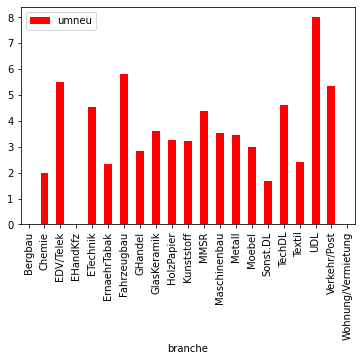

In [10]:
#Prototype

#filter op alle bedrijven met een prototype IP en check hun % aan revenue door innovatieve prodcuten
dfCommon2 = dataSet.filter(items=['branche', 'umneu', 'schutz2'])
dfCommon2 = dfCommon2.replace(['x=0','0<x<5','5<=x<10','10<=x<15','15<=x<20',
                                           '20<=x<30','30<=x<50', '50<=x<75', '75<=x<=100'],
                                          [0,1,2,3,4,5,6,7,8])

dfCommon2 = dfCommon2.loc[dfCommon2['schutz2']=='ja']
dfCommon2['branche'].unique()
prototypeAnalysis = dfCommon2.groupby('branche', as_index=False)['umneu'].mean()
print(prototypeAnalysis)
prototypeAnalysis.plot(kind='bar', x='branche', y= 'umneu', color='#b0d43b')

#brief description of the data
print(prototypeAnalysis.describe())
print('median: ', prototypeAnalysis.median())



               branche     umneu
0            Bank/Vers  2.105882
1              Bergbau  0.653846
2               Chemie  2.729167
3            EDV/Telek  4.136364
4             EHandKfz  1.216216
5             ETechnik  4.063492
6         ErnaehrTabak  1.745098
7          Fahrzeugbau  3.093750
8              GHandel  1.285714
9          GlasKeramik  2.000000
10          HolzPapier  2.526316
11          Kunststoff  2.372881
12                MMSR  4.250000
13        Maschinenbau  3.062500
14              Metall  1.666667
15              Moebel  1.764706
16            Sonst.DL  1.409836
17              TechDL  2.744186
18              Textil  1.475000
19                 UDL  2.639344
20        Verkehr/Post  0.669355
21  Wohnung/Vermietung  0.416667


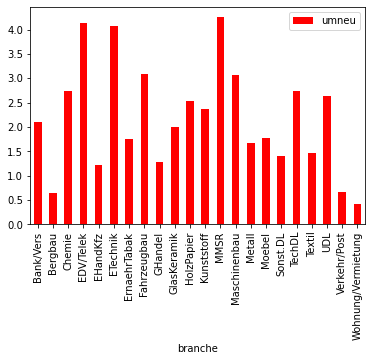

In [11]:

#Brands

#filter op alle bedrijven met een brands IP en check hun % aan revenue door innovatieve prodcuten
dfCommon3 = dataSet.filter(items=['branche', 'umneu', 'schutz3'])
dfCommon3 = dfCommon3.replace(['x=0','0<x<5','5<=x<10','10<=x<15','15<=x<20',
                                           '20<=x<30','30<=x<50', '50<=x<75', '75<=x<=100'],
                                          [0,1,2,3,4,5,6,7,8])
dfCommon3 = dfCommon3.loc[dfCommon3['schutz3']=='ja']

dfCommon3['branche'].unique()
brandsAnalysis = dfCommon3.groupby('branche', as_index=False)['umneu'].mean()
print(brandsAnalysis)
brandsAnalysis.plot(kind='bar', x='branche', y= 'umneu', color='#b0d43b')

#brief description of the data
print(brandsAnalysis.describe())
print('median: ', brandsAnalysis.median())


In [159]:

#Copyrights

#filter op alle bedrijven met een copyrights en check hun % aan revenue door innovatieve prodcuten
dfCommon4 = dataSet.filter(items=['branche', 'umneu', 'schutz4'])
dfCommon4 = dfCommon4.replace(['x=0','0<x<5','5<=x<10','10<=x<15','15<=x<20',
                                           '20<=x<30','30<=x<50', '50<=x<75', '75<=x<=100'],
                                          [0,1,2,3,4,5,6,7,8])
dfCommon4 = dfCommon4.loc[dfCommon4['schutz4']=='ja']

dfCommon4['branche'].unique()
copyrightsAnalysis = dfCommon4.groupby('branche', as_index=False)['umneu'].mean()
print(copyrightsAnalysis)
copyrightsAnalysis.plot(kind='bar', x='branche', y= 'umneu', color='#b0d43b')

#brief description of the data
print(copyrightsAnalysis.describe())
print('median: ', copyrightsAnalysis.median())


               um       umneu schutz4
0      410.083980         NaN    nein
1       41.936646         NaN     NaN
2        1.829996         x=0    nein
3        3.071281  75<=x<=100    nein
4        1.901261  75<=x<=100      ja
...           ...         ...     ...
1995     0.474227    10<=x<15    nein
1996  1017.291200    50<=x<75     NaN
1997     2.526801         x=0    nein
1998     0.248527         NaN    nein
1999     4.051942         x=0    nein

[2000 rows x 3 columns]


In [160]:

#Confidentiality

#filter op alle bedrijven met een confidentiality en check hun % aan revenue door innovatieve prodcuten

dfCommon5 = dataSet.filter(items=['branche', 'umneu', 'schutz5'])
dfCommon5 = dfCommon5.replace(['x=0','0<x<5','5<=x<10','10<=x<15','15<=x<20',
                                           '20<=x<30','30<=x<50', '50<=x<75', '75<=x<=100'],
                                          [0,1,2,3,4,5,6,7,8])
dfCommon5 = dfCommon5.loc[dfCommon5['schutz5']=='ja']

dfCommon5['branche'].unique()
confidentialityAnalysis = dfCommon5.groupby('branche', as_index=False)['umneu'].mean()
print(confidentialityAnalysis)
confidentialityAnalysis.plot(kind='bar', x='branche', y= 'umneu', color='#b0d43b')

#brief description of the data
print(confidentialityAnalysis.describe())
print('median: ', confidentialityAnalysis.median())


,um,umneu,schutz4
0,410.083980,NaN,nein
2,1.829996,x=0,nein
3,3.071281,75<=x<=100,nein
5,4.129015,x=0,nein
6,2.382081,x=0,nein
...,...,...,...
1994,1.034749,x=0,nein
1995,0.474227,10<=x<15,nein
1997,2.526801,x=0,nein
1998,0.248527,NaN,nein


                um  umneu schutz4
996       0.000000    0.0      ja
752       0.000000    0.0      ja
393       0.000000    0.0      ja
731       0.076848    0.0      ja
443       0.214861    0.0      ja
...            ...    ...     ...
1974   5186.966000    6.0      ja
389    5189.144000    6.0      ja
371    5608.280300    0.0      ja
724    5620.295400    0.0      ja
1731  12204.173000    3.0      ja

[117 rows x 3 columns]


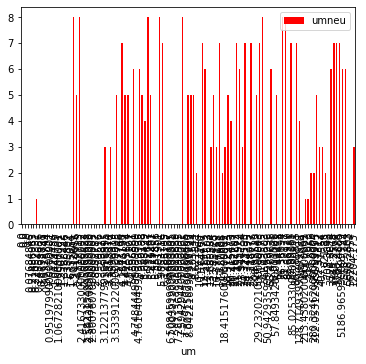

In [161]:

#Complex design

#filter op alle bedrijven met een complex design IP en check hun % aan revenue door innovatieve prodcuten

dfCommon6 = dataSet.filter(items=['branche', 'umneu', 'schutz6'])
dfCommon6 = dfCommon6.replace(['x=0','0<x<5','5<=x<10','10<=x<15','15<=x<20',
                                           '20<=x<30','30<=x<50', '50<=x<75', '75<=x<=100'],
                                          [0,1,2,3,4,5,6,7,8])
dfCommon6 = dfCommon6.loc[dfCommon6['schutz6']=='ja']

dfCommon6['branche'].unique()
complexdesignAnalysis = dfCommon6.groupby('branche', as_index=False)['umneu'].mean()
print(complexdesignAnalysis)
complexdesignAnalysis.plot(kind='bar', x='branche', y= 'umneu', color='#b0d43b')

#brief description of the data
print(complexdesignAnalysis.describe())
print('median: ', complexdesignAnalysis.median())


               branche     umneu
0            Bank/Vers  3.466667
1              Bergbau  0.666667
2               Chemie  3.600000
3            EDV/Telek  4.750000
4             EHandKfz  4.777778
5             ETechnik  4.648649
6         ErnaehrTabak  2.214286
7          Fahrzeugbau  5.125000
8              GHandel  2.923077
9          GlasKeramik  4.142857
10          HolzPapier  4.285714
11          Kunststoff  3.576923
12                MMSR  4.870968
13        Maschinenbau  3.784615
14              Metall  3.454545
15              Moebel  3.400000
16            Sonst.DL  2.578947
17              TechDL  5.228571
18              Textil  2.555556
19                 UDL  4.785714
20        Verkehr/Post  2.333333
21  Wohnung/Vermietung  1.000000


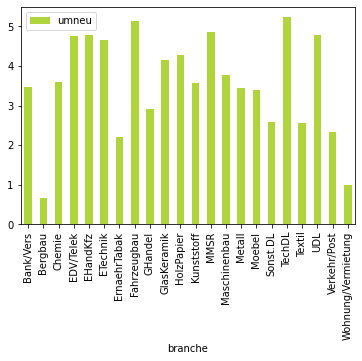

In [191]:

#advantage due to headstart

#filter op alle bedrijven met een advantage due to headstart IP en check hun % aan revenue door innovatieve prodcuten
dfCommon7 = dataSet.filter(items=['branche', 'umneu', 'schutz7'])
dfCommon7 = dfCommon7.replace(['x=0','0<x<5','5<=x<10','10<=x<15','15<=x<20',
                                           '20<=x<30','30<=x<50', '50<=x<75', '75<=x<=100'],
                                          [0,1,2,3,4,5,6,7,8])
dfCommon7 = dfCommon7.loc[dfCommon7['schutz7']=='ja']

dfCommon7['branche'].unique()
advantageduetoheadstartAnalysis = dfCommon7.groupby('branche', as_index=False)['umneu'].mean()
print(advantageduetoheadstartAnalysis)
advantageduetoheadstartAnalysis.plot(kind='bar', x='branche', y= 'umneu', color='#b0d43b')

#brief description of the data
print(advantageduetoheadstartAnalysis.describe())
print('median: ', advantageduetoheadstartAnalysis.median())